# Topics in Economics - Project 2 

## Section 4

#### We will use the Fama-French three-factor model, which are Market, SMB, and HML, to predict stock returns and find the impact of MEVs on Fama-French factors using linear regressions. By combining these two, we can predict the performance of a portfolio. We will compare the performance of your portfolio under supervisory baseline vs severely adverse scenarios. When reporting the results of each set of regressions, provide the point estimate, either standard deviation or t-stats, goodness-of-fit, and residual analysis if it is abnormal


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

C:\Users\anton\AppData\Local\Temp\ipykernel_5148\4279371829.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file_path= r'Data\2024-Table_2A_Historic_Domestic.csv'

mev = pd.read_csv(file_path)
print(mev.columns)
mev.head(1)

Index(['Date', 'Real GDP growth', 'Nominal GDP growth',
       'Real disposable income growth', 'Nominal disposable income growth',
       'Unemployment rate', 'CPI inflation rate', '3-month Treasury rate',
       '5-year Treasury yield', '10-year Treasury yield',
       'BBB corporate yield', 'Mortgage rate', 'Prime rate',
       'Dow Jones Total Stock Market Index (Level)',
       'House Price Index (Level)',
       'Commercial Real Estate Price Index (Level)',
       'Market Volatility Index (Level)'],
      dtype='object')


,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,1990 Q1,4.4,9.0,3.3,9.4,5.3,7.1,7.8,8.5,8.5,10.4,10.1,10.0,3273.5,76.0,108.4,27.3


In [4]:
# Macro Economic Variable Baseline Scenario
file_path_2 = r'Data\2024-Table_3A_Supervisory_Baseline_Domestic.csv'

mev_BaselineScenario = pd.read_csv(file_path_2)
print(mev_BaselineScenario.columns)
mev_BaselineScenario.head(1)

Index(['Scenario Name', 'Date', 'Real GDP growth', 'Nominal GDP growth',
       'Real disposable income growth', 'Nominal disposable income growth',
       'Unemployment rate', 'CPI inflation rate', '3-month Treasury rate',
       '5-year Treasury yield', '10-year Treasury yield',
       'BBB corporate yield', 'Mortgage rate', 'Prime rate',
       'Dow Jones Total Stock Market Index (Level)',
       'House Price Index (Level)',
       'Commercial Real Estate Price Index (Level)',
       'Market Volatility Index (Level)'],
      dtype='object')


,Scenario Name,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Supervisory Baseline,2024 Q1,1.0,3.2,2.5,4.6,3.9,2.4,5.3,4.2,4.1,5.8,6.5,8.4,47787.5,311.6,350.2,24.6


In [5]:
# Macro Economic Variable Baseline Forecast

file_path_3 = r'Data\2024-Table_4A_Supervisory_Severely_Adverse_Domestic.csv'

mev_StressedScenario = pd.read_csv(file_path_3)
print(mev_StressedScenario.columns)
mev_BaselineScenario.head(1)


Index(['Scenario Name', 'Date', 'Real GDP growth', 'Nominal GDP growth',
       'Real disposable income growth', 'Nominal disposable income growth',
       'Unemployment rate', 'CPI inflation rate', '3-month Treasury rate',
       '5-year Treasury yield', '10-year Treasury yield',
       'BBB corporate yield', 'Mortgage rate', 'Prime rate',
       'Dow Jones Total Stock Market Index (Level)',
       'House Price Index (Level)',
       'Commercial Real Estate Price Index (Level)',
       'Market Volatility Index (Level)'],
      dtype='object')


,Scenario Name,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Supervisory Baseline,2024 Q1,1.0,3.2,2.5,4.6,3.9,2.4,5.3,4.2,4.1,5.8,6.5,8.4,47787.5,311.6,350.2,24.6


In [6]:
file_path_4 = r'Data\wrds_data.xlsx'
wrds_data = pd.read_excel(file_path_4)


#filter important columns
relevant_columns = ['Date', 'ARCHER-DANIELS-MIDLAND CO', 'BANK OF AMERICA CORP',
       'BIOGEN INC', 'CITIGROUP INC', 'CONAGRA BRANDS INC',
       'COLGATE-PALMOLIVE CO', 'CAMPBELL SOUP CO', 'GOLDMAN SACHS GROUP INC',
       'JOHNSON & JOHNSON', 'JPMORGAN CHASE & CO', 'KELLANOVA',
       'KRAFT HEINZ CO', 'COCA-COLA CO', 'LILLY (ELI) & CO', 'MERCK & CO',
       'MORGAN STANLEY', 'PFIZER INC', 'PROCTER & GAMBLE CO',
       'TYSON FOODS INC  -CL A', 'WALMART INC', 'MKT COMPOSITE RETURN',
       'S&P RETURN', 'FAMA-FRENCH MARKET FACTOR', 'RISK-FREE RATE',
       'FAMA-FRENCH SIZE FACTOR (SMB)', 'FAMA-FRENCH VALUE FACTOR (HML)',
       'MOMENTUM FACTOR']

wrds_data = wrds_data[relevant_columns]
print(wrds_data.columns)
wrds_data.head(6)

Index(['Date', 'ARCHER-DANIELS-MIDLAND CO', 'BANK OF AMERICA CORP',
       'BIOGEN INC', 'CITIGROUP INC', 'CONAGRA BRANDS INC',
       'COLGATE-PALMOLIVE CO', 'CAMPBELL SOUP CO', 'GOLDMAN SACHS GROUP INC',
       'JOHNSON & JOHNSON', 'JPMORGAN CHASE & CO', 'KELLANOVA',
       'KRAFT HEINZ CO', 'COCA-COLA CO', 'LILLY (ELI) & CO', 'MERCK & CO',
       'MORGAN STANLEY', 'PFIZER INC', 'PROCTER & GAMBLE CO',
       'TYSON FOODS INC  -CL A', 'WALMART INC', 'MKT COMPOSITE RETURN',
       'S&P RETURN', 'FAMA-FRENCH MARKET FACTOR', 'RISK-FREE RATE',
       'FAMA-FRENCH SIZE FACTOR (SMB)', 'FAMA-FRENCH VALUE FACTOR (HML)',
       'MOMENTUM FACTOR'],
      dtype='object')


C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Date,ARCHER-DANIELS-MIDLAND CO,BANK OF AMERICA CORP,BIOGEN INC,CITIGROUP INC,CONAGRA BRANDS INC,COLGATE-PALMOLIVE CO,CAMPBELL SOUP CO,GOLDMAN SACHS GROUP INC,JOHNSON & JOHNSON,...,PROCTER & GAMBLE CO,TYSON FOODS INC -CL A,WALMART INC,MKT COMPOSITE RETURN,S&P RETURN,FAMA-FRENCH MARKET FACTOR,RISK-FREE RATE,FAMA-FRENCH SIZE FACTOR (SMB),FAMA-FRENCH VALUE FACTOR (HML),MOMENTUM FACTOR
0,1963-01,NaN,0.0608,NaN,NaN,NaN,0.0724,0.0935,NaN,0.1024,...,0.0337,NaN,NaN,NaN,0.0491,0.0493,0.0025,0.0308,0.0221,-0.0211
1,1963-02,NaN,0.0145,NaN,NaN,NaN,0.0000,-0.1033,NaN,0.0196,...,-0.0307,NaN,NaN,NaN,-0.0289,-0.0238,0.0023,0.0048,0.0218,0.0253
2,1963-03,NaN,0.0139,NaN,NaN,NaN,0.0722,0.0119,NaN,0.0033,...,0.0423,NaN,NaN,NaN,0.0355,0.0308,0.0023,-0.0259,0.0206,0.0162
3,1963-04,NaN,0.1339,NaN,NaN,NaN,0.0459,0.0031,NaN,0.0120,...,0.0561,NaN,NaN,NaN,0.0485,0.0451,0.0025,-0.0134,0.0100,-0.0009
4,1963-05,NaN,0.0686,NaN,NaN,NaN,0.0102,0.0210,NaN,0.0509,...,-0.0161,NaN,NaN,NaN,0.0143,0.0176,0.0024,0.0113,0.0254,0.0033
5,1963-06,NaN,-0.0293,NaN,NaN,NaN,0.0731,-0.0231,NaN,0.0000,...,-0.0098,NaN,NaN,NaN,-0.0202,-0.0200,0.0023,-0.0027,0.0075,0.0121


#### 1 - Read the details about MEVs. Pick a subset of MEVs to represent a severely adverse scenarios under which you will stress test your portfolio. Provide economic justification for your choice.

We are using this subset:


#Real GDP growth, Real disposable income growth, Unemployment rate, Inflation rate,5-year Treasury yield 10-year Treasury rate,Market Volatility Index (Level)'

1. Market Volatility Index (Level)
 - Purpose: This index, often exemplified by metrics like the VIX, measures market risk, uncertainty, and investors' sentiments. It spikes during times of financial distress or market turbulence.
 - Relevance in Stress Testing: It acts as a gauge for the overall risk environment in the financial markets. High values typically correlate with lower market prices and increased investor fear, making it crucial for assessing risk under stress scenarios.
2. Unemployment Rate
 - Purpose: The unemployment rate is a lagging indicator that provides insights into the health of the labor market. Changes in the unemployment rate are closely tied to economic activity and consumer confidence.
 - Relevance in Stress Testing: It helps evaluate the resilience of the economy in face of adverse events. Higher unemployment may lead to lower consumer spending and could be a precursor to recession, affecting the performance of investments and loan defaults.
3. CPI Inflation Rate
 - Purpose: The Consumer Price Index (CPI) measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. It's a direct measure of purchasing power and price stability.
 - Relevance in Stress Testing: Inflation impacts interest rates, currency values, and overall economic policies. Understanding how scenarios affect inflation helps in forecasting cost of living adjustments, wage growth demands, and policy shifts.
4. Real GDP Growth
 - Purpose: GDP growth measures the economic activity and health of the economy, reflecting the total output of goods and services.
 - Relevance in Stress Testing: It’s essential for assessing the potential growth or contraction in the economy under different scenarios. A decline in GDP growth could signal a recession, affecting investment portfolios, corporate earnings, and employment rates.
5. 3-month Treasury Rate
 - Purpose: Short-term Treasury rates are influenced by the Federal Reserve's policies and are indicative of the short-term borrowing costs.
 - Relevance in Stress Testing: The 3-month Treasury rate is a benchmark for many other rates, including bank loan rates and mortgages. Changes in this rate can influence the entire financial system, affecting liquidity, borrowing costs, and economic growth.

#### Integrating These Variables in Stress Testing

By incorporating these variables, a stress test can comprehensively evaluate how different sectors of the economy and financial markets would behave under various hypothetical adverse scenarios. Here’s how they integrate:

 - Risk Assessment: The Volatility Index and Treasury rates can highlight shifts in risk appetite and funding costs.
 - Economic Impact: GDP and unemployment provide a direct view of economic resilience or weakness.
 - Consumer Impact: CPI gives insight into the consumer side, affecting consumption patterns and retail sales.

Each variable covers a different facet of economic and market dynamics, ensuring that the stress tests can uncover potential vulnerabilities and help in making informed decisions to mitigate those risks.

#### 2 - Report the results from the Fama-French three-factor model.

The Fama-French three-factor model is formulated as follows:

$$
r_{i,t} - r_{f,t} = \alpha_i + \beta_{i,M} (Rm_t - Rf_t) + \beta_{i,SMB} SMB_t + \beta_{i,HML} HML_t + \epsilon_{i,t}
$$

In [7]:
"""
data = {
    "Sector": [
        "Industrials", "Financial", "Financial", "Consumer Goods", 
        "Consumer Goods", "Consumer Goods", "Healthcare", 
        "Healthcare", "Healthcare", "Healthcare", "Consumer Services",
        "Food", "Food", "Retail", "Technology"
    ],
    "Stock Name": [
        "ARCHER-DANIELS-MIDLAND CO", "BANK OF AMERICA CORP", "CONAGRA BRANDS INC", 
        "COLGATE-PALMOLIVE CO", "CAMPBELL SOUP CO", "JOHNSON & JOHNSON",
        "JPMORGAN CHASE & CO", "KELLANOVA", "COCA-COLA CO", "LILLY (ELI) & CO", 
        "MERCK & CO", "PFIZER INC",'PROCTER & GAMBLE CO', "TYSON FOODS INC  -CL A", 
        "WALMART INC"
    ],
    "Start Date": ["1976-01"] * 15,  # Consistent for all stocks
    "Weight (%)": [
        0.02299, 0.00000, 0.06073, 0.00000, 0.00000, 0.00000,
        0.07766, 0.08402, 0.07325, 0.16213, 0.01177, 0.00240,
        0.09576, 0.27850, 0.04500
    ]
}
"""




'\ndata = {\n    "Sector": [\n        "Industrials", "Financial", "Financial", "Consumer Goods", \n        "Consumer Goods", "Consumer Goods", "Healthcare", \n        "Healthcare", "Healthcare", "Healthcare", "Consumer Services",\n        "Food", "Food", "Retail", "Technology"\n    ],\n    "Stock Name": [\n        "ARCHER-DANIELS-MIDLAND CO", "BANK OF AMERICA CORP", "CONAGRA BRANDS INC", \n        "COLGATE-PALMOLIVE CO", "CAMPBELL SOUP CO", "JOHNSON & JOHNSON",\n        "JPMORGAN CHASE & CO", "KELLANOVA", "COCA-COLA CO", "LILLY (ELI) & CO", \n        "MERCK & CO", "PFIZER INC",\'PROCTER & GAMBLE CO\', "TYSON FOODS INC  -CL A", \n        "WALMART INC"\n    ],\n    "Start Date": ["1976-01"] * 15,  # Consistent for all stocks\n    "Weight (%)": [\n        0.02299, 0.00000, 0.06073, 0.00000, 0.00000, 0.00000,\n        0.07766, 0.08402, 0.07325, 0.16213, 0.01177, 0.00240,\n        0.09576, 0.27850, 0.04500\n    ]\n}\n'

C:\Users\anton\AppData\Local\Temp\ipykernel_5148\988281623.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="1963-01-01", end="2024-01-01", freq="M")


<Figure size 1200x600 with 0 Axes>

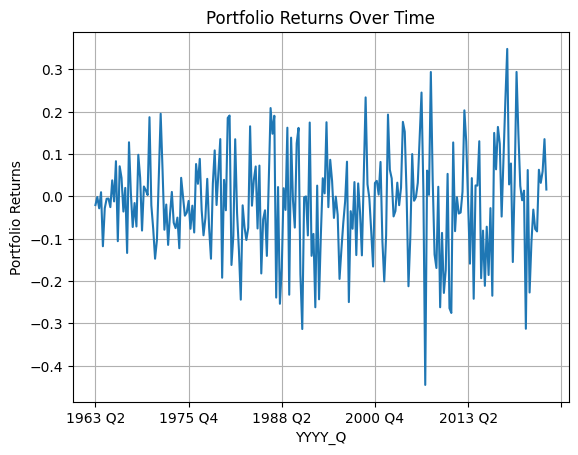

In [8]:
# Portfolio data
portfolio_data = {
    "Sector": ["Financial", "Financial", "Financial", "Financial", "Healthcare", "Healthcare", "Healthcare", "Healthcare",
               "Consumer Goods", "Consumer Goods", "Consumer Goods", "Consumer Goods", "Industrials", "Consumer Services",
               "Food", "Food", "Technology"],
    "Stock Name": ["BANK OF AMERICA CORP", "JPMORGAN CHASE & CO", "MORGAN STANLEY", "CITIGROUP INC", "JOHNSON & JOHNSON", 
                   "PFIZER INC", "MERCK & CO", "LILLY (ELI) & CO", "COCA-COLA CO", "PROCTER & GAMBLE CO", 
                   "COLGATE-PALMOLIVE CO", "CAMPBELL SOUP CO", "ARCHER-DANIELS-MIDLAND CO", "WALMART INC", 
                   "TYSON FOODS INC  -CL A", "CONAGRA BRANDS INC", "BIOGEN INC"],
    "Start Date": ["1963-01", "1963-01", "1986-04", "1986-11", "1963-01", "1963-01", "1963-01", "1963-01", 
                   "1963-01", "1963-01", "1963-01", "1963-01", "1964-04", "1970-11", "1968-02", "1968-02", "1991-10"],
    "Weight (%)": [3.57, 3.57, 3.57, 3.57, 3.57, 3.57, 3.57, 3.57, 3.57, 3.57, 3.57, 3.57, 14.29, 14.29, 7.14, 7.14, 14.29]
}

portfolio_df = pd.DataFrame(portfolio_data)

np.random.seed(42)
dates = pd.date_range(start="1963-01-01", end="2024-01-01", freq="M")
wrds_data = pd.DataFrame({
    "DATE": dates.strftime("%Y-%m"),
    "RISK-FREE RATE": np.random.rand(len(dates)) / 100,
    "FAMA-FRENCH MARKET FACTOR": np.random.randn(len(dates)) / 10,
    "FAMA-FRENCH SIZE FACTOR (SMB)": np.random.randn(len(dates)) / 10,
    "FAMA-FRENCH VALUE FACTOR (HML)": np.random.randn(len(dates)) / 10
})

# Add random stock returns
for stock in portfolio_df["Stock Name"]:
    wrds_data[stock] = np.random.randn(len(dates)) / 10

# Normalize column names
wrds_data.columns = wrds_data.columns.str.strip().str.upper()
portfolio_df['Stock Name'] = portfolio_df['Stock Name'].str.strip().str.upper()

# Helper function for converting YYYY-MM to YYYY-Q format
def YYYY_MM_to_YYYY_Q(date):
    year, month = date.split('-')
    if month in ['01', '02', '03']:
        return f"{year} Q1"
    elif month in ['04', '05', '06']:
        return f"{year} Q2"
    elif month in ['07', '08', '09']:
        return f"{year} Q3"
    else:
        return f"{year} Q4"

# Check for mismatches
missing_stocks = [stock for stock in portfolio_df['Stock Name'] if stock not in wrds_data.columns]
if missing_stocks:
    portfolio_df = portfolio_df[~portfolio_df['Stock Name'].isin(missing_stocks)]

# Prepare portfolio data
stock_names = portfolio_df['Stock Name'].to_list()
portfolio_initial_weights = portfolio_df[['Stock Name', 'Weight (%)']].set_index('Stock Name')

# Columns to use
factor_cols = ['FAMA-FRENCH MARKET FACTOR', 'FAMA-FRENCH SIZE FACTOR (SMB)', 'FAMA-FRENCH VALUE FACTOR (HML)']
wrds_cols = ['DATE', 'RISK-FREE RATE'] + stock_names + factor_cols

# Process WRDS data
return_data = wrds_data[wrds_cols].dropna().copy()
return_data['YYYY_Q'] = return_data['DATE'].apply(YYYY_MM_to_YYYY_Q)
return_data[['RISK-FREE RATE'] + stock_names + factor_cols] = np.log(1 + return_data[['RISK-FREE RATE'] + stock_names + factor_cols])

# Convert to quarterly returns and subtract risk-free rate
quarterly_return_data = return_data.drop('DATE', axis=1).groupby('YYYY_Q').sum()
quarterly_return_data_er = quarterly_return_data.sub(quarterly_return_data['RISK-FREE RATE'], axis=0)

# Calculate portfolio returns
portfolio_returns_er = quarterly_return_data_er[stock_names].copy()
portfolio_returns_er.loc['1991 Q3'] = np.zeros(len(stock_names))
portfolio_returns_er.sort_index(inplace=True)
portfolio_returns_er = np.exp(portfolio_returns_er.cumsum()) @ (portfolio_initial_weights / 100)
portfolio_returns_er = np.log(portfolio_returns_er / portfolio_returns_er.shift())
portfolio_returns_er.columns = ['Portfolio Returns']
portfolio_returns_er.dropna(inplace=True)

# Plot Portfolio Returns
plt.figure(figsize=(12, 6))
portfolio_returns_er.plot(title="Portfolio Returns Over Time", legend=False)
plt.xlabel("YYYY_Q")
plt.ylabel("Portfolio Returns")
plt.grid(True)
plt.show()

In [9]:
# Align indices for y (Portfolio Returns) and X (Factors)
X = quarterly_return_data_er[factor_cols]
X = sm.add_constant(X)  # Add constant for intercept
y = portfolio_returns_er

# Ensure X and y have aligned indices
X, y = X.align(y, join='inner', axis=0)

# Fama-French three-factor model regression
model = sm.OLS(y, X).fit()

# Extract regression coefficients
coefficients = model.params
t_stats = model.tvalues
r_squared = model.rsquared

# Calculate Treynor Ratio and Information Ratio
treynor_ratio = y.mean() / coefficients['FAMA-FRENCH MARKET FACTOR']
portfolio_residuals = model.resid
information_ratio = y.mean() / portfolio_residuals.std()

# Combine results into a DataFrame for display
results_df = pd.DataFrame({
    'Treynor Ratio': [treynor_ratio],
    'Information Ratio': [information_ratio],
    'R^2': [r_squared],
    'Const': [coefficients['const']],
    'FAMA-FRENCH MARKET FACTOR Beta': [coefficients['FAMA-FRENCH MARKET FACTOR']],
    'FAMA-FRENCH SIZE FACTOR (SMB) Beta': [coefficients['FAMA-FRENCH SIZE FACTOR (SMB)']],
    'FAMA-FRENCH VALUE FACTOR (HML) Beta': [coefficients['FAMA-FRENCH VALUE FACTOR (HML)']],
    'Const t-stat': [t_stats['const']],
    'FAMA-FRENCH MARKET FACTOR Beta t-stat': [t_stats['FAMA-FRENCH MARKET FACTOR']],
    'FAMA-FRENCH SIZE FACTOR (SMB) Beta t-stat': [t_stats['FAMA-FRENCH SIZE FACTOR (SMB)']],
    'FAMA-FRENCH VALUE FACTOR (HML) Beta t-stat': [t_stats['FAMA-FRENCH VALUE FACTOR (HML)']]
})


results_df.T

,0
Treynor Ratio,Portfolio Returns 0.546134 dtype: float64
Information Ratio,Portfolio Returns -0.129203 dtype: float64
R^2,0.006108
Const,-0.015651
FAMA-FRENCH MARKET FACTOR Beta,-0.029046
FAMA-FRENCH SIZE FACTOR (SMB) Beta,-0.020157
FAMA-FRENCH VALUE FACTOR (HML) Beta,0.04392
Const t-stat,-1.950949
FAMA-FRENCH MARKET FACTOR Beta t-stat,-0.620605
FAMA-FRENCH SIZE FACTOR (SMB) Beta t-stat,-0.428462


#### 3 - Use data from all times to run a linear regression to identify the impact of your chosen MEVs on Fama-French factors. Report the results. Be aware that return and factor data are monthly while MEVs are quarterly.

In [ ]:

# Load the MEVs data
file_path = r'Data\2024-Table_2A_Historic_Domestic.csv'
MEVs_data = pd.read_csv(file_path)


def regression_based_performance(factor,fund_ret,rf,constant = True, annualization_constant = 12):
    """ 
        Returns the Regression based performance Stats for given set of returns and factors
        Inputs:
            factor - Dataframe containing monthly returns of the regressors
            fund_ret - Dataframe containing monthly excess (MAYBE NOT EXCESS) returns of the regressand fund
            rf - Monthly risk free rate of return
        Output:
            summary_stats - (Beta of regression, treynor ratio, information ratio, alpha). 
    """
    if constant:
        X = sm.tools.add_constant(factor)
    else:
        X = factor
    y=fund_ret
    model = sm.OLS(y,X,missing='drop').fit()
    
    if constant:
        beta = model.params[1:]
        alpha = round(float(model.params['const']),6)
        
    else:
        beta = model.params
        
    
    # We removed .values from rf since we do not have any risk-free data to worry about
    treynor_ratio = ((fund_ret.values-rf).mean()*annualization_constant)/beta[0]
    tracking_error = (model.resid.std()*np.sqrt(annualization_constant))
    coeff_tstats = model.tvalues
    if constant:        
        information_ratio = model.params[0]*annualization_constant/tracking_error
    r_squared = model.rsquared
    
    if constant:
        return (beta,treynor_ratio,information_ratio,alpha,r_squared,tracking_error, coeff_tstats, model.resid)
    else:
        return (beta,treynor_ratio,r_squared,tracking_error, coeff_tstats, model.resid)

def factor_model_time_series_test(portfolio_returns, factor_returns, annualization_constant = 12):
    factor_list = factor_returns.columns
    portfolio_list = portfolio_returns.columns

    beta_list = []
    beta_t_stat_list = ['Const t-stat']
    for factor in factor_list:
        beta_list.append(factor + ' Beta')
        beta_t_stat_list.append(factor + ' Beta t-stat')

    time_series_test_info = pd.DataFrame(index = portfolio_list, columns = ['Treynor Ratio', 'Information Ratio', 'R^2', 'Const'] + beta_list + beta_t_stat_list)

    resid_dict = {}
    for port in portfolio_list:
        fund_returns = portfolio_returns[port]
        reg_stats = regression_based_performance(factor_returns, fund_returns, 0, constant = True)
        
        # We assume that the market factor will always be included
        treynor_ratio = reg_stats[1]
        information_ratio = reg_stats[2]
        r_squared = reg_stats[4]

        # We have removed the annualization of the intercept for this assignment
        alpha = reg_stats[3] #* annualization_constant
        
        time_series_test_info.loc[port] = [treynor_ratio, information_ratio, r_squared, alpha] + reg_stats[0].to_list() + reg_stats[-2].to_list()
        resid_dict[port] = reg_stats[-1]

    MAE = time_series_test_info['Const'].abs().mean()
    avg_r_squared = time_series_test_info['R^2'].mean()

    model_info = pd.DataFrame([[MAE, avg_r_squared]], index = ['Factor Model'], columns = ['Mean Absolute Error', 'Average R-Squared'])

    return time_series_test_info, model_info, resid_dict


MEV_list = ['Market Volatility Index (Level)', 'Unemployment rate', 'CPI inflation rate', 'Real GDP growth', '3-month Treasury rate']
MEV_data_subset = MEVs_data[['Date'] + MEV_list].set_index('Date')
MEV_FF_joint_df = pd.concat([quarterly_return_data_er, MEV_data_subset], join = 'outer', axis = 1).dropna()


time_series_test_info, model_info, resid_dict= factor_model_time_series_test(MEV_FF_joint_df[factor_cols], MEV_FF_joint_df[MEV_list], annualization_constant=4)
time_series_test_info

In [ ]:
#Replication
file_path = r'Data\2024-Table_2A_Historic_Domestic.csv'
MEVs_data = pd.read_csv(file_path)

# Define MEV variables of interest
MEV_list = ['Market Volatility Index (Level)', 'Unemployment rate', 'CPI inflation rate', 'Real GDP growth', '3-month Treasury rate']

# Ensure MEVs_data contains the correct columns
MEVs_data.columns = MEVs_data.columns.str.strip()  # Strip whitespace from column names
if not all(mev in MEVs_data.columns for mev in ['Date'] + MEV_list):
    missing_cols = [col for col in ['Date'] + MEV_list if col not in MEVs_data.columns]
    raise ValueError(f"Missing columns in MEVs_data: {missing_cols}")

# Convert quarter-based Date values to datetime
def parse_quarter_to_date(quarter_str):
    year, quarter = quarter_str.split(" ")
    month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}[quarter]
    return f"{year}-{month}-01"

MEVs_data['Date'] = MEVs_data['Date'].apply(parse_quarter_to_date)
MEVs_data['Date'] = pd.to_datetime(MEVs_data['Date'])  # Convert to datetime

# Subset and interpolate MEV data
MEV_data_subset = MEVs_data[['Date'] + MEV_list].set_index('Date')
MEV_data_subset = MEV_data_subset.resample('Q').interpolate()

# Ensure the Fama-French factors and quarterly_return_data_er exist
factor_cols = ['FAMA-FRENCH MARKET FACTOR', 'FAMA-FRENCH SIZE FACTOR (SMB)', 'FAMA-FRENCH VALUE FACTOR (HML)']

# Debugging the MEV_data_subset
print(f"Shape of MEV_data_subset after resampling: {MEV_data_subset.shape}")

# Merge MEVs with Fama-French factors
MEV_FF_joint_df = pd.concat([quarterly_return_data_er, MEV_data_subset], join='inner', axis=1)

# Debugging the merged DataFrame
print(f"Shape of MEV_FF_joint_df after merge: {MEV_FF_joint_df.shape}")
print(f"Columns of MEV_FF_joint_df: {MEV_FF_joint_df.columns.tolist()}")

# Ensure no null values in MEV_FF_joint_df
MEV_FF_joint_df.dropna(inplace=True)

# Perform regression analysis
results = {}
for factor in factor_cols:
    # Independent variables (MEVs) with a constant term
    X = sm.add_constant(MEV_FF_joint_df[MEV_list])
    y = MEV_FF_joint_df[factor]

    # Debug dimensions
    print(f"Running regression for {factor}...")
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

    # Ensure X and y are not empty
    if X.empty or y.empty:
        print(f"Empty data for {factor}, skipping regression.")
        continue

    # Linear regression
    model = sm.OLS(y, X).fit()

    # Store results
    results[factor] = {
        'coefficients': model.params,
        't_stats': model.tvalues,
        'r_squared': model.rsquared
    }

# Prepare results for tabular display
results_table = []
for factor, result in results.items():
    for mev in result['coefficients'].index:
        results_table.append({
            'Factor': factor,
            'MEV': mev,
            'Coefficient': result['coefficients'][mev],
            't-stat': result['t_stats'][mev],
            'R-squared': result['r_squared'] if mev == 'const' else None  # Only display R-squared once per factor
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results_table)

# Output the results
print("Regression Results:")
print(results_df)

# Example plot: CPI inflation rate vs. Fama-French Market Factor
plt.figure(figsize=(10, 6))
plt.scatter(MEV_FF_joint_df['CPI inflation rate'], MEV_FF_joint_df['FAMA-FRENCH MARKET FACTOR'], alpha=0.6)
plt.title("CPI Inflation Rate vs. Fama-French Market Factor")
plt.xlabel("CPI Inflation Rate")
plt.ylabel("Fama-French Market Factor")
plt.grid()
plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_5148\1909261024.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  treynor_ratio = ((fund_ret.values-rf).mean()*annualization_constant)/beta[0]
C:\Users\anton\AppData\Local\Temp\ipykernel_5148\1909261024.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  information_ratio = model.params[0]*annualization_constant/tracking_error
C:\Users\anton\AppData\Local\Temp\ipykernel_5148\1909261024.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior).

,Treynor Ratio,Information Ratio,R^2,Const,Market Volatility Index (Level) Beta,Unemployment rate Beta,CPI inflation rate Beta,Real GDP growth Beta,3-month Treasury rate Beta,Const t-stat,Market Volatility Index (Level) Beta t-stat,Unemployment rate Beta t-stat,CPI inflation rate Beta t-stat,Real GDP growth Beta t-stat,3-month Treasury rate Beta t-stat
FAMA-FRENCH MARKET FACTOR,64.0287,-2.251117,0.033548,-0.104908,0.000204,0.010067,0.005897,-0.002035,0.012202,-1.292352,0.151657,1.096112,0.877759,-0.593775,1.700876
FAMA-FRENCH SIZE FACTOR (SMB),-149.100148,-3.461317,0.033365,-0.163348,0.001386,0.012715,0.000212,0.005381,0.008147,-1.98712,1.01719,1.367131,0.031112,1.55085,1.121514
FAMA-FRENCH VALUE FACTOR (HML),-165.966255,0.707943,0.038504,0.033013,0.000973,-0.011632,0.009456,-0.001684,-0.010333,0.406426,0.722587,-1.265694,1.406743,-0.491057,-1.439427


In [ ]:
# Plot example: CPI inflation rate's impact on Fama-French Market Factor
plt.figure(figsize=(10, 6))
plt.scatter(MEV_FF_joint_df['CPI inflation rate'], MEV_FF_joint_df['FAMA-FRENCH MARKET FACTOR'], alpha=0.6)
plt.title("CPI Inflation Rate vs. Fama-French Market Factor")
plt.xlabel("CPI Inflation Rate")
plt.ylabel("Fama-French Market Factor")
plt.grid()
plt.show()